In [1]:
import pandas as pd

# Load the dataset
file_path = "datasets/cicddos2019_dataset.csv"  # Replace with your dataset path
raw_data = pd.read_csv(file_path)

# Display basic info about the dataset
print(raw_data.info())
print(raw_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431371 entries, 0 to 431370
Data columns (total 80 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                431371 non-null  int64  
 1   Protocol                  431371 non-null  int64  
 2   Flow Duration             431371 non-null  int64  
 3   Total Fwd Packets         431371 non-null  int64  
 4   Total Backward Packets    431371 non-null  int64  
 5   Fwd Packets Length Total  431371 non-null  float64
 6   Bwd Packets Length Total  431371 non-null  float64
 7   Fwd Packet Length Max     431371 non-null  float64
 8   Fwd Packet Length Min     431371 non-null  float64
 9   Fwd Packet Length Mean    431371 non-null  float64
 10  Fwd Packet Length Std     431371 non-null  float64
 11  Bwd Packet Length Max     431371 non-null  float64
 12  Bwd Packet Length Min     431371 non-null  float64
 13  Bwd Packet Length Mean    431371 non-null  f

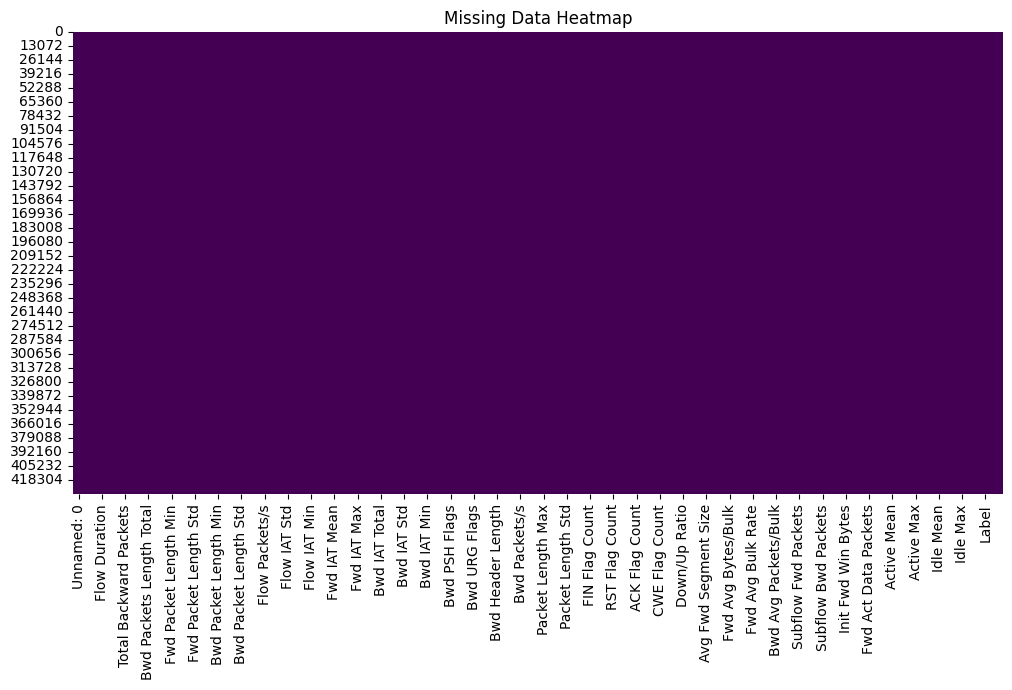

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(raw_data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

/tmp/ipykernel_22237/2503567392.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Class", data=raw_data, palette="coolwarm")


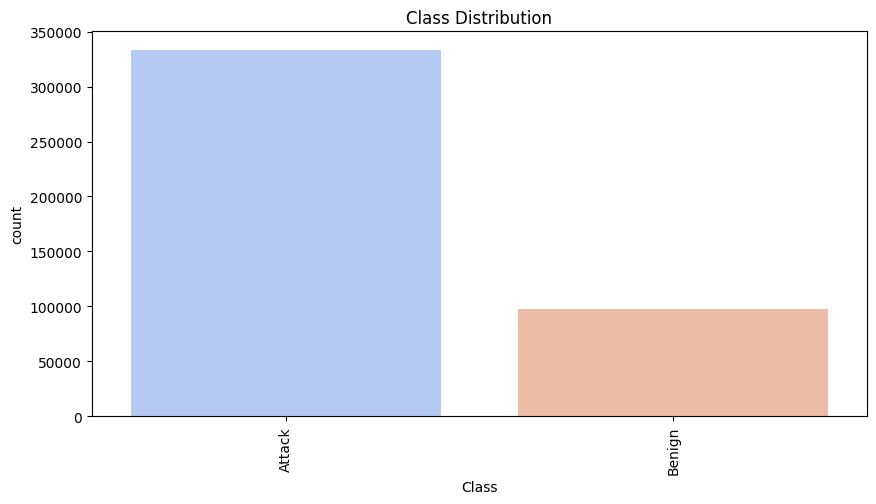

In [3]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Class", data=raw_data, palette="coolwarm")
plt.title("Class Distribution")
plt.xticks(rotation=90)
plt.show()

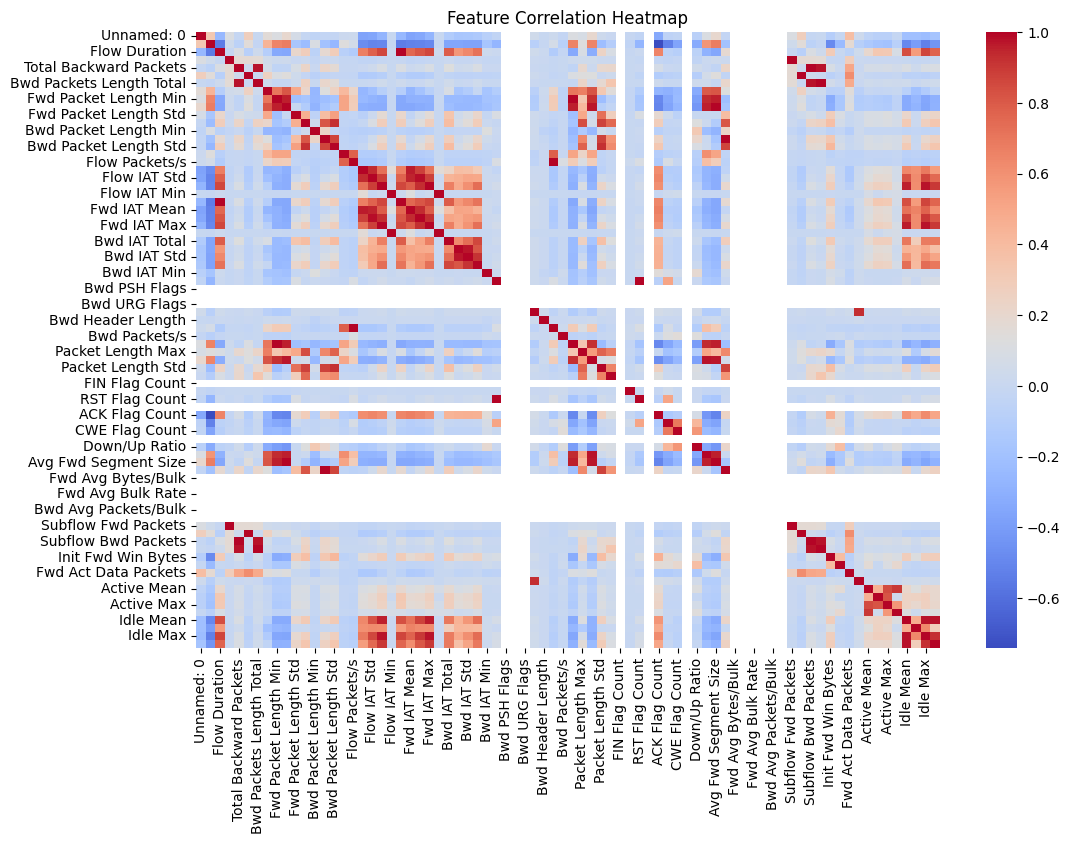

In [4]:
# Compute correlation matrix for numerical features
numeric_raw_data = raw_data.select_dtypes(include=[float,int])
corr_matrix = numeric_raw_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

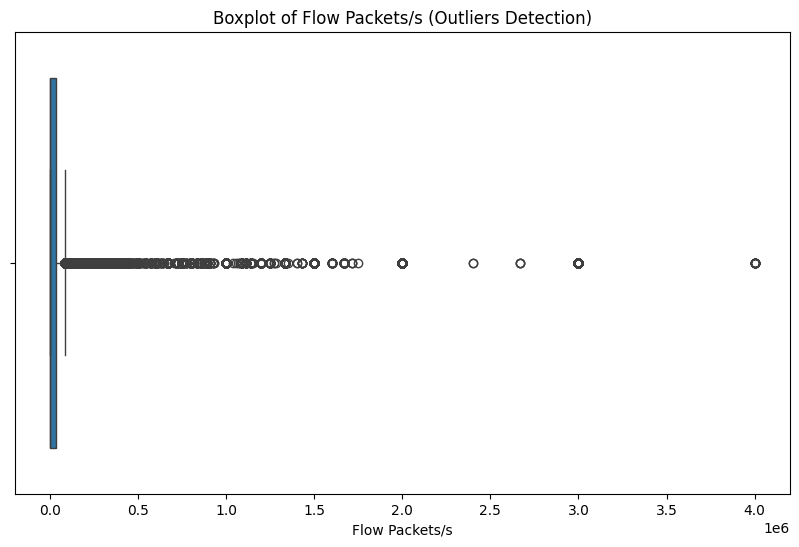

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=raw_data["Flow Packets/s"])
plt.title("Boxplot of Flow Packets/s (Outliers Detection)")
plt.show()

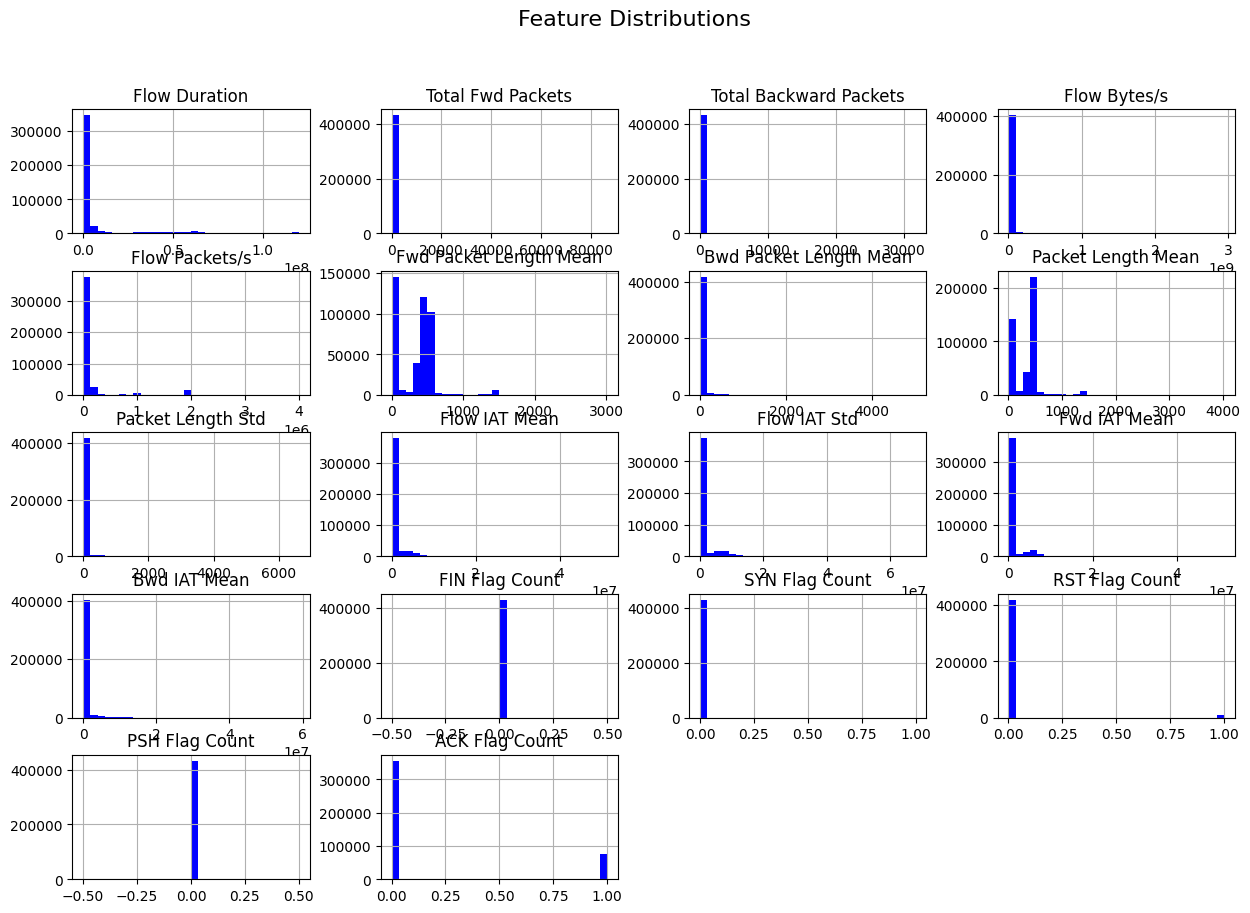

In [6]:
selected_columns = [
    'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
    'Flow Bytes/s', 'Flow Packets/s', 'Fwd Packet Length Mean',
    'Bwd Packet Length Mean', 'Packet Length Mean', 'Packet Length Std',
    'Flow IAT Mean', 'Flow IAT Std', 'Fwd IAT Mean', 'Bwd IAT Mean',
    'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count',
    'PSH Flag Count', 'ACK Flag Count', 'Class'
]

raw_data[selected_columns].hist(bins=30, figsize=(15, 10), color="blue")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

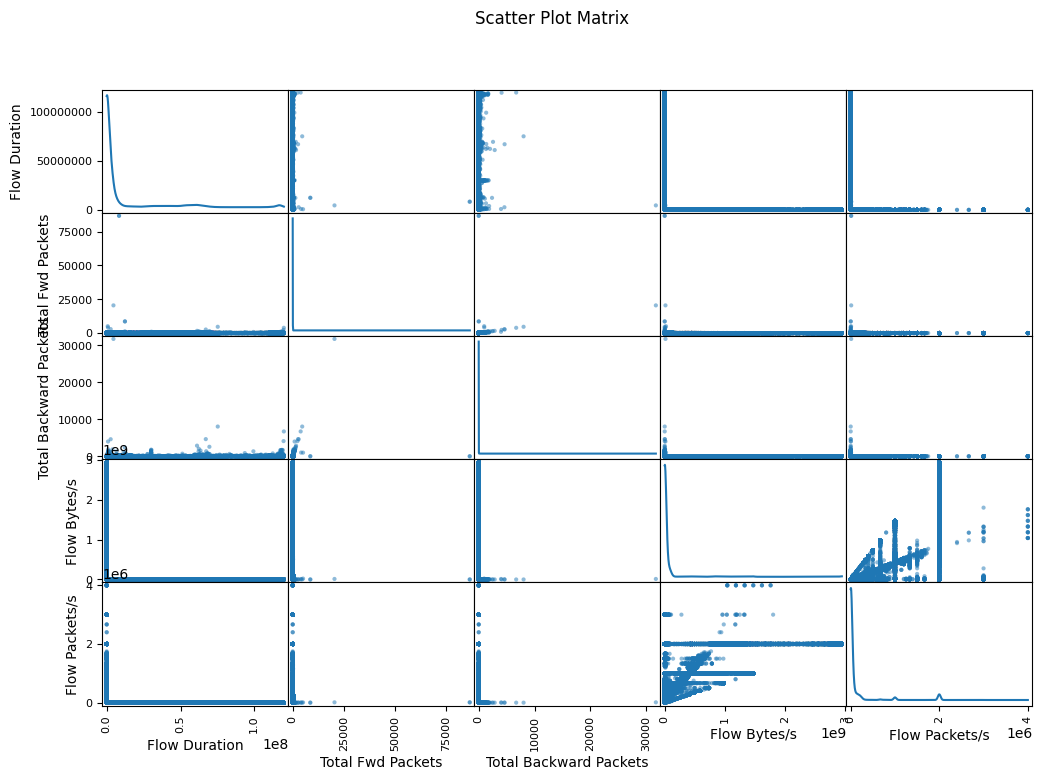

In [7]:
from pandas.plotting import scatter_matrix

scatter_matrix(raw_data[selected_columns[:5]], figsize=(12, 8), diagonal="kde")
plt.suptitle("Scatter Plot Matrix")
plt.show()